In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates


from matplotlib import pyplot
%matplotlib inline

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False
mpl.rc("font", family = "Malgun Gothic")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings(action='ignore')

# 구별 클러스터링

In [3]:
goo=pd.read_excel('fin_dataset_goo.xlsx')
goo

,goo_nm,goo_area,sum_pop,sum_hh,one_hh,one_ratio,cc_value,count_zero,count_market,count_univ,count_bus,count_station,sum_bus,sum_station,sum_order,sum_waste
0,강남구,39.51,544055,208833,58663,0.107825,457,0,46,1,552,22,102636377,107653238,68999,5556.9
1,강동구,24.58,463998,177148,39486,0.085100,414,3,21,0,396,10,34783737,34193728,50316,2766.3
2,강북구,23.60,311569,129805,32979,0.105848,320,0,17,0,412,11,57437812,25855961,45685,838.3
3,강서구,41.44,585901,244097,69879,0.119268,548,1,22,2,619,16,55236175,43691763,86172,4928.8
4,관악구,29.57,509803,248959,115556,0.226668,460,2,24,1,490,6,89607537,61049638,129233,1631.4
5,광진구,17.06,360109,152090,54100,0.150232,343,1,23,3,292,9,32782959,48074042,62301,1584.9
6,구로구,20.12,432488,164083,40152,0.092840,187,0,24,3,480,10,60262348,53472371,50971,1278.5
7,금천구,13.02,247835,103432,34714,0.140069,126,0,20,0,354,3,44554050,18515469,42334,3794.8
8,노원구,35.56,527032,202695,38700,0.073430,441,1,19,5,535,12,49940954,45054621,56438,1108.3
9,도봉구,20.46,327361,127362,24178,0.073857,370,0,12,1,366,6,38499802,22486646,34884,1290.8


## kmeans - standard

In [17]:
goo=pd.read_excel('fin_dataset_goo.xlsx')
g1=goo[['goo_nm','sum_hh','count_zero','count_market','count_bus','count_station','sum_waste']]
g2=g1.drop(columns='goo_nm')

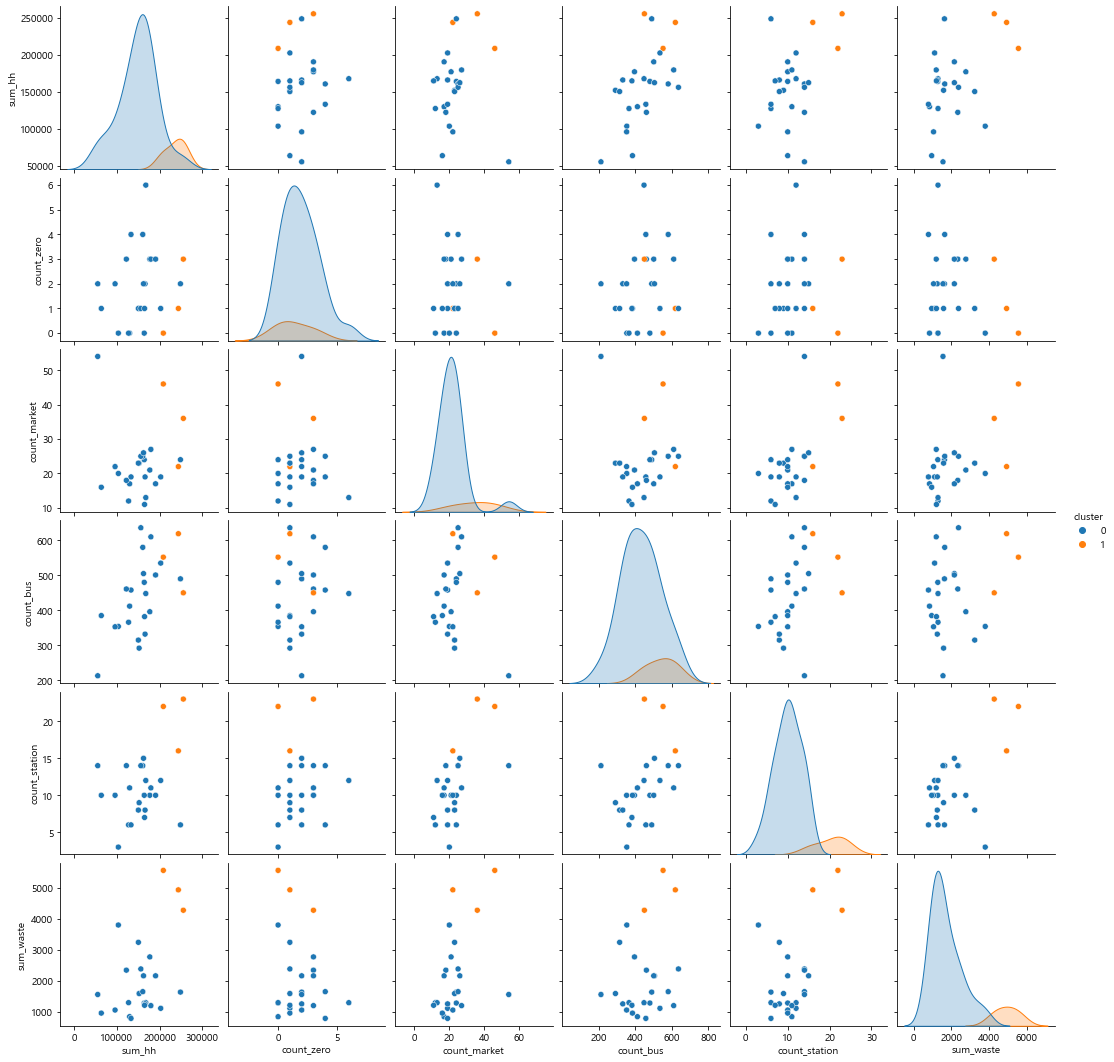

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
sns.pairplot(g1,hue='cluster')
plt.show()

In [13]:
#실루엣 계수 계산을 통해 최적의 군집 개수 찾기

for k in range(2,15):
    scaler=StandardScaler()
    scaled_sd=scaler.fit_transform(g2)
    
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(scaled_sd)
    g1['cluster']=kmeans.fit_predict(scaled_sd)
    #g1['cluster']=clusters.labels_
    
    score_samples = silhouette_samples(g2, g1.cluster)
    g2['silhouette_coeff'] = score_samples
    
    average_score=silhouette_score(g2, g1.cluster)
    print('k:',k, 'score:',round(average_score,5))
    

k: 2 score: 0.42198
k: 3 score: 0.09104
k: 4 score: -0.00771
k: 5 score: -0.00909
k: 6 score: -0.03403
k: 7 score: -0.13003
k: 8 score: -0.17782
k: 9 score: -0.27738
k: 10 score: -0.23014
k: 11 score: -0.45002
k: 12 score: -0.31214
k: 13 score: -0.42705
k: 14 score: -0.34492


Text(0, 0.5, 'Sum of squared distance')

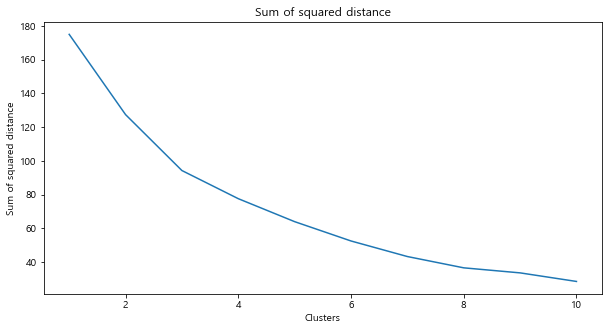

In [5]:
from sklearn.cluster import KMeans

cluster_range = [i+1 for i in range(10)]
clus_error = []

for i in cluster_range:
    clus = KMeans(i)
    clus.fit(scaled_sd)
    clus_error.append(clus.inertia_)
    
ds_error = pd.DataFrame({"NumberofCluster":cluster_range, "Error":clus_error})

plt.figure(figsize = (10,5))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [18]:
# k=2 ( 0.42 )

scaler = StandardScaler()
scaled_sd = scaler.fit_transform(g2)

kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit(scaled_sd)
g1['cluster']=kmeans.fit_predict(scaled_sd)
#g1['cluster']=clusters.labels_

cluster_km_st=pd.DataFrame(kmeans.cluster_centers_)
cluster_km_st=cluster_km_st.rename(columns={0:'sum_hh',1:'count_zero',2:'count_market',3:'count_bus',4:'count_station',5:'sum_waste'})

cluster_km_st['cluster_count']=" "
for i in range(12):
    cluster_km_st['cluster_count'][i]=g1[g1['cluster']==i]['cluster'].count()

cluster_km_st.sort_values('sum_hh',ascending=False)

,sum_hh,count_zero,count_market,count_bus,count_station,sum_waste,cluster_count
1,1.543991,-0.340482,1.208257,0.895794,1.985160,2.197198,3
0,-0.210544,0.046429,-0.164762,-0.122154,-0.270704,-0.299618,22


In [7]:
g1[g1['cluster']==0]['goo_nm'].unique()

array(['강남구', '강서구', '송파구'], dtype=object)

In [6]:
g1

,goo_nm,sum_hh,count_zero,count_market,count_bus,count_station,sum_waste,cluster
0,강남구,208833,0,46,552,22,5556.9,2
1,강동구,177148,3,21,396,10,2766.3,1
2,강북구,129805,0,17,412,11,838.3,0
3,강서구,244097,1,22,619,16,4928.8,2
4,관악구,248959,2,24,490,6,1631.4,1
5,광진구,152090,1,23,292,9,1584.9,0
6,구로구,164083,0,24,480,10,1278.5,1
7,금천구,103432,0,20,354,3,3794.8,0
8,노원구,202695,1,19,535,12,1108.3,1
9,도봉구,127362,0,12,366,6,1290.8,0


## kmeans - robust

In [13]:
goo=pd.read_excel('fin_dataset_goo.xlsx')
g1=goo[['goo_nm','sum_hh','count_zero','count_market','count_bus','count_station','sum_waste']]
g2=g1.drop(columns='goo_nm')

In [14]:
#실루엣 계수 계산을 통해 최적의 군집 개수 찾기

for k in range(2,15):
    scaler=RobustScaler()
    scaled_ro=scaler.fit_transform(g2)
    
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(scaled_ro)
    g1['cluster']=kmeans.fit_predict(scaled_ro)
    #g1['cluster']=clusters.labels_
    
    score_samples = silhouette_samples(g2, g1.cluster)
    g2['silhouette_coeff'] = score_samples
    
    average_score=silhouette_score(g2, g1.cluster)
    print('k:',k, 'score:',average_score)
    

k: 2 score: 0.39933175562794637
k: 3 score: 0.28141518301857116
k: 4 score: -0.00771331960578038
k: 5 score: -0.09253226548841412
k: 6 score: -0.13769178728349327
k: 7 score: -0.33653762034064516
k: 8 score: -0.2604443105423249
k: 9 score: -0.31401625595553284
k: 10 score: -0.316932774457566
k: 11 score: -0.2685520572034208
k: 12 score: -0.33188055579800163
k: 13 score: -0.3529277119711717
k: 14 score: -0.31437457610517094


In [15]:
# k=2 (0.399)

scaler=RobustScaler()
scaled_ro=scaler.fit_transform(g2)
    
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit(scaled_ro)
g1['cluster']=kmeans.fit_predict(scaled_ro)
#g1['cluster']=clusters.labels_
    
cluster_km_st=pd.DataFrame(kmeans.cluster_centers_)
cluster_km_st=cluster_km_st.rename(columns={0:'sum_hh',1:'count_zero',2:'count_market',3:'count_bus',4:'count_station',5:'sum_waste'})

cluster_km_st['cluster_count']=" "
for i in range(12):
    cluster_km_st['cluster_count'][i]=g1[g1['cluster']==i]['cluster'].count()

cluster_km_st.sort_values('sum_hh',ascending=False)

,sum_hh,count_zero,count_market,count_bus,count_station,sum_waste,6,cluster_count
1,0.217424,-0.166667,3.333333,-0.323741,1.611111,1.884879,0.463988,3
0,-0.100294,-0.068182,-0.266234,0.003270,0.015152,0.232609,-0.030442,22


In [18]:
g1[g1['cluster']==1]['goo_nm'].unique()

array(['강남구', '송파구', '중구'], dtype=object)

## kmeans - minmax  

In [20]:
goo=pd.read_excel('fin_dataset_goo.xlsx')
g1=goo[['goo_nm','sum_hh','count_zero','count_market','count_bus','count_station','sum_waste']]
g2=g1.drop(columns='goo_nm')

In [21]:
#실루엣 계수 계산을 통해 최적의 군집 개수 찾기

for k in range(2,15):
    scaler=MinMaxScaler()
    scaled_mm=scaler.fit_transform(g2)
    
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(scaled_mm)
    g1['cluster']=kmeans.fit_predict(scaled_mm)
    #g1['cluster']=clusters.labels_
    
    score_samples = silhouette_samples(g2, g1.cluster)
    g2['silhouette_coeff'] = score_samples
    
    average_score=silhouette_score(g2, g1.cluster)
    print('k:',k, 'score:',average_score)

k: 2 score: 0.4219793301460096
k: 3 score: 0.09104380877592981
k: 4 score: 0.10939795912611067
k: 5 score: 0.021099575938184276
k: 6 score: -0.023222869096809724
k: 7 score: -0.1411161560413851
k: 8 score: -0.16602164891844928
k: 9 score: -0.30522594432832567
k: 10 score: -0.33341825782037465
k: 11 score: -0.3131322214200425
k: 12 score: -0.2383184135873065
k: 13 score: -0.37103918129440244
k: 14 score: -0.40326096473241146


In [22]:
#k=2 (0.4219)

scaler=MinMaxScaler()
scaled_mm=scaler.fit_transform(g2)
    
kmeans=KMeans(n_clusters=3)
clusters=kmeans.fit(scaled_mm)
g1['cluster']=kmeans.fit_predict(scaled_mm)
#g1['cluster']=clusters.labels_
    
cluster_km_st=pd.DataFrame(kmeans.cluster_centers_)
cluster_km_st=cluster_km_st.rename(columns={0:'sum_hh',1:'count_zero',2:'count_market',3:'count_bus',4:'count_station'})

cluster_km_st['cluster_count']=" "
for i in range(12):
    cluster_km_st['cluster_count'][i]=g1[g1['cluster']==i]['cluster'].count()

cluster_km_st.sort_values('sum_hh',ascending=False)

,sum_hh,count_zero,count_market,count_bus,count_station,5,6,cluster_count
2,0.902658,0.222222,0.550388,0.773838,0.866667,0.866425,0.950981,3
0,0.508639,0.266667,0.215504,0.578408,0.360000,0.235997,0.244196,15
1,0.377656,0.428571,0.312292,0.387707,0.328571,0.100815,0.951479,7


In [23]:
g1[g1['cluster']==2]['goo_nm'].unique()

array(['강남구', '강서구', '송파구'], dtype=object)

# 동별 클러스터링

In [24]:
dong=pd.read_excel('fin_dataset_dong.xlsx')
dong.head(2)

,gd_nm,goo_nm,dong_ID,dong_nm,dong_area,sum_pop,sum_hh,one_hh,cc_value,count_zero,count_market,count_univ,count_bus,count_station,sum_bus,sum_station,sum_order,sum_waste,y,x
0,송파구 가락1동,송파구,11710631,가락1동,1.46,27876,9534,1045,0,0,1,0,10,2,2605376,6434890,73694,4271.9,37.496537,127.105726
1,송파구 가락2동,송파구,11710632,가락2동,1.34,33204,11482,1892,10,0,2,0,22,2,2181971,3449427,73694,4271.9,37.498639,127.126488


## kmeans-standard

In [18]:
dong=pd.read_excel('fin_dataset_dong.xlsx')
d1=dong[['gd_nm','sum_hh','count_zero','count_market','count_bus','count_station']]
d2=d1.drop(columns='gd_nm')

In [19]:
#실루엣 계수 계산을 통해 최적의 군집 개수 찾기

for k in range(2,15):
    scaler=StandardScaler()
    scaled_sd=scaler.fit_transform(d2)
    
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(scaled_sd)
    d1['cluster']=kmeans.fit_predict(scaled_sd)
    #d1['cluster']=clusters.labels_
    
    score_samples = silhouette_samples(d2, d1.cluster)
    d2['silhouette_coeff'] = score_samples
    
    average_score=silhouette_score(d2, d1.cluster)
    print('k:',k, 'score:',average_score)
    

k: 2 score: 0.2984483753946443
k: 3 score: 0.2874472723429791
k: 4 score: 0.028950239964515886
k: 5 score: 0.048015532981107396
k: 6 score: 0.04887679008962721
k: 7 score: -0.07722861020893904
k: 8 score: -0.11586213876240428
k: 9 score: -0.10989947369305428
k: 10 score: -0.15126164511349594
k: 11 score: -0.1698506553717922
k: 12 score: -0.1503453585042801
k: 13 score: -0.1858015018485864
k: 14 score: -0.19017513421538013


In [20]:
#k=2 (0.298)

scaler=MinMaxScaler()
scaled_mm=scaler.fit_transform(d2)
    
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit(scaled_mm)
d1['cluster']=kmeans.fit_predict(scaled_sd)
#d1['cluster']=clusters.labels_
    
cluster_km_st=pd.DataFrame(kmeans.cluster_centers_)
cluster_km_st=cluster_km_st.rename(columns={0:'sum_hh',1:'count_zero',2:'count_market',3:'count_bus',4:'count_station'})

cluster_km_st['cluster_count']=" "
for i in range(12):
    cluster_km_st['cluster_count'][i]=d1[d1['cluster']==i]['cluster'].count()

cluster_km_st.sort_values('sum_hh',ascending=False)

,sum_hh,count_zero,count_market,count_bus,count_station,5,cluster_count
1,0.661681,0.596225,0.704880,0.798192,1.060735,-0.406682,114
0,-0.243328,-0.219257,-0.259214,-0.293529,-0.390077,0.149554,310


## kmeans-robust

In [21]:
dong=pd.read_excel('fin_dataset_dong.xlsx')
d1=dong[['gd_nm','sum_hh','count_zero','count_market','count_bus','count_station']]
d2=d1.drop(columns='gd_nm')

In [22]:
#실루엣 계수 계산을 통해 최적의 군집 개수 찾기

for k in range(2,15):
    scaler=RobustScaler()
    scaled_ro=scaler.fit_transform(d2)
    
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(scaled_ro)
    d1['cluster']=kmeans.fit_predict(scaled_ro)
    #d1['cluster']=clusters.labels_
    
    score_samples = silhouette_samples(d2, d1.cluster)
    d2['silhouette_coeff'] = score_samples
    
    average_score=silhouette_score(d2, d1.cluster)
    print('k:',k, 'score:',average_score)
    

k: 2 score: 0.30279179107838283
k: 3 score: 0.29728681621425973
k: 4 score: 0.06074438212513124
k: 5 score: 0.09657110136751773
k: 6 score: -0.008149173508306415
k: 7 score: -0.08270560292529335
k: 8 score: -0.030281836294296465
k: 9 score: -0.0943292969402148
k: 10 score: -0.15776475464834455
k: 11 score: -0.15704964465105106
k: 12 score: -0.14824046328479984
k: 13 score: -0.14597562176921147
k: 14 score: -0.17401845060659776


In [23]:
#k=2 (0.303)

scaler=RobustScaler()
scaled_ro=scaler.fit_transform(d2)
    
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit(scaled_ro)
d1['cluster']=kmeans.fit_predict(scaled_ro)
#d1['cluster']=clusters.labels_
    
cluster_km_st=pd.DataFrame(kmeans.cluster_centers_)
cluster_km_st=cluster_km_st.rename(columns={0:'sum_hh',1:'count_zero',2:'count_market',3:'count_bus',4:'count_station'})

cluster_km_st['cluster_count']=" "
for i in range(12):
    cluster_km_st['cluster_count'][i]=d1[d1['cluster']==i]['cluster'].count()

cluster_km_st.sort_values('sum_hh',ascending=False)

,sum_hh,count_zero,count_market,count_bus,count_station,5,cluster_count
0,0.591597,0.171429,0.735714,0.739286,1.407143,-0.167268,140
1,-0.197438,0.077465,-0.089789,-0.178795,0.295775,0.314887,284


## kmeans-minmax

In [24]:
dong=pd.read_excel('fin_dataset_dong.xlsx')
d1=dong[['gd_nm','sum_hh','count_zero','count_market','count_bus','count_station']]
d2=d1.drop(columns='gd_nm')

In [25]:
#실루엣 계수 계산을 통해 최적의 군집 개수 찾기

for k in range(2,15):
    scaler=MinMaxScaler()
    scaled_mm=scaler.fit_transform(d2)
    
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(scaled_mm)
    d1['cluster']=kmeans.fit_predict(scaled_mm)
    #d1['cluster']=clusters.labels_
    
    score_samples = silhouette_samples(d2, d1.cluster)
    d2['silhouette_coeff'] = score_samples
    
    average_score=silhouette_score(d2, d1.cluster)
    print('k:',k, 'score:',average_score)

k: 2 score: 0.24607370543921642
k: 3 score: 0.23990409552612543
k: 4 score: 0.1277355293579512
k: 5 score: 0.04229099522473945
k: 6 score: 0.0072964875237882375
k: 7 score: -0.06514950881321446
k: 8 score: -0.09175929750597575
k: 9 score: -0.14365425768061615
k: 10 score: -0.10743126078929673
k: 11 score: -0.15447965412444603
k: 12 score: -0.23245614414050514
k: 13 score: -0.17608563865774424
k: 14 score: -0.18435451327434588


In [26]:
#k=2 (0.246)

scaler=MinMaxScaler()
scaled_mm=scaler.fit_transform(d2)
    
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit(scaled_mm)
d1['cluster']=kmeans.fit_predict(scaled_mm)
#d1['cluster']=clusters.labels_
    
cluster_km_st=pd.DataFrame(kmeans.cluster_centers_)
cluster_km_st=cluster_km_st.rename(columns={0:'sum_hh',1:'count_zero',2:'count_market',3:'count_bus',4:'count_station'})

cluster_km_st['cluster_count']=" "
for i in range(12):
    cluster_km_st['cluster_count'][i]=d1[d1['cluster']==i]['cluster'].count()

cluster_km_st.sort_values('sum_hh',ascending=False)

,sum_hh,count_zero,count_market,count_bus,count_station,5,cluster_count
1,0.390914,6.938894e-17,0.077945,0.230889,0.08046,0.763095,174
0,0.379294,9.200000e-02,0.090500,0.238408,0.22500,0.313566,250


In [27]:
d1[d1['cluster']==1]['gd_nm'].unique()

array(['금천구 가산동', '강서구 가양1동', '강서구 가양2동', '강서구 가양3동', '은평구 갈현1동',
       '은평구 갈현2동', '강동구 강일동', '구로구 개봉3동', '강남구 개포2동', '강남구 개포4동',
       '송파구 거여2동', '강동구 고덕1동', '구로구 고척2동', '마포구 공덕동', '노원구 공릉1동',
       '노원구 공릉2동', '중구 광희동', '종로구 교남동', '구로구 구로1동', '구로구 구로4동', '은평구 구산동',
       '광진구 구의2동', '광진구 군자동', '강동구 길동', '관악구 난곡동', '관악구 난향동', '동작구 노량진1동',
       '동작구 노량진2동', '중구 다산동', '동대문구 답십리1동', '동대문구 답십리2동', '영등포구 당산2동',
       '영등포구 대림1동', '영등포구 대림2동', '영등포구 대림3동', '강남구 대치1동', '강남구 도곡1동',
       '영등포구 도림동', '금천구 독산2동', '금천구 독산3동', '금천구 독산4동', '성북구 돈암1동',
       '성북구 돈암2동', '강동구 둔촌2동', '강서구 등촌3동', '성동구 마장동', '송파구 마천2동',
       '중랑구 망우3동', '중랑구 망우본동', '중랑구 면목2동', '중랑구 면목3·8동', '중랑구 면목5동',
       '중랑구 면목7동', '중구 명동', '양천구 목4동', '영등포구 문래동', '송파구 문정1동', '강북구 미아동',
       '서초구 반포3동', '서초구 방배4동', '서초구 방배본동', '도봉구 방학2동', '강서구 방화1동',
       '강서구 방화3동', '강북구 번2동', '강북구 번3동', '관악구 보라매동', '서대문구 북아현동',
       '은평구 불광1동', '동작구 사당3동', '동작구 사당5동', '강북구 삼각산동', '노원구 상계10동',
       '노원구 상계5동', '노원구 상계9동', '동작